# Machine Learning:

## Bibliotheken importieren:

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime as datetime
import time

print("Import completed.")

Import completed.


## Trainings- und Testdatensatz:

In [2]:
train = pd.read_csv('cleanbooksdata.csv')

In [3]:
# Bleibt: rating, num_ratings, price, type, das Jahr
train = train.drop(['title', 'currency', 'author'], axis=1)
train = train.drop(train.columns[0], axis=1)

In [4]:
#Für die Vorhersage wird 0 und 1 für die Werte gesetzt: Taschenbuch = 0, Gebundenes Buch = 1 
train['type'] = train['type'].str.replace('Taschenbuch', '0')
train['type'] = train['type'].str.replace('Gebundenes Buch', '1')
train['booktype'] = train['type'].astype(object).astype(int)
train = train.drop('type', axis=1)
display(train)

,rating,num_ratings,price,date,booktype
0,4.7,67538.0,20.41,10. Dezember 2018,0
1,4.5,8627.0,11.49,5. Februar 2013,1
2,4.5,99055.0,12.44,13. September 2016,0
3,4.6,33078.0,11.49,10. Mai 2012,0
4,4.6,22039.0,5.69,23. März 2017,0
...,...,...,...,...,...
81,4.4,1478.0,10.54,15. April 2019,0
82,4.3,6049.0,1.98,29. November 2004,0
83,4.7,24188.0,10.24,4. Januar 2018,0
84,4.6,37461.0,7.77,22. Mai 2012,0


In [5]:
# Erstellung einer Liste mit den Monatsnamen auf Deutsch:
month_names = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 
               'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']

# Definieren einer Funktion zum Konvertieren der deutschen Datumszeichenfolge in ein Datetime-Objekt:
def german_date_to_datetime(date_string):
    # die Datumszeichenfolge auf Tag, Monat und Jahr aufteilen:
        day, month_name, year = date_string.split()
    # Entfernung aller nachgestellten Punkte aus der Tageskomponente:
        day = day.rstrip('.')
    # Konvertieren der Monatsnamen in die entsprechende Monatsnummer:
        month = month_names.index(month_name) + 1
    # Erstellung von einem Datetime-Objekt aus dem Tag, Monat und Jahr:
        return datetime.datetime(int(year), month, int(day))
        

# Anwendung der Funktion auf die Spalte „datum“ des DataFrame: 
train['date'] = train['date'].apply(german_date_to_datetime)

In [6]:
train['date'] = train['date'].dt.year

In [7]:
display(train)

,rating,num_ratings,price,date,booktype
0,4.7,67538.0,20.41,2018,0
1,4.5,8627.0,11.49,2013,1
2,4.5,99055.0,12.44,2016,0
3,4.6,33078.0,11.49,2012,0
4,4.6,22039.0,5.69,2017,0
...,...,...,...,...,...
81,4.4,1478.0,10.54,2019,0
82,4.3,6049.0,1.98,2004,0
83,4.7,24188.0,10.24,2018,0
84,4.6,37461.0,7.77,2012,0


In [8]:
train['age'] = 2023 - (train['date'])
train = train.drop(['date'], axis=1)

In [9]:
# Aufzeigen der ersten 5 Zeilen des DataFrame
print(train.head())

   rating  num_ratings  price  booktype  age
0     4.7      67538.0  20.41         0    5
1     4.5       8627.0  11.49         1   10
2     4.5      99055.0  12.44         0    7
3     4.6      33078.0  11.49         0   11
4     4.6      22039.0   5.69         0    6


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       86 non-null     float64
 1   num_ratings  86 non-null     float64
 2   price        86 non-null     float64
 3   booktype     86 non-null     int32  
 4   age          86 non-null     int64  
dtypes: float64(3), int32(1), int64(1)
memory usage: 3.1 KB


In [11]:
# Datenaufteilung auf Training und Test:
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)

# Das "Shape" von dem Trainings- und Testdataset aufzeigen:
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (68, 5)
Testing data shape: (18, 5)


## Standardisierung: 
Wir brauchen Standardisierung, weil wir jetzt wegen dem Preis (als Zielvariable) Linear Regression haben.

In [12]:
train_data

,rating,num_ratings,price,booktype,age
54,4.6,3790.0,9.47,0,8
72,4.4,22511.0,11.30,0,8
11,4.5,17535.0,11.86,0,21
30,4.7,64560.0,10.05,0,6
40,4.6,24826.0,9.38,0,7
...,...,...,...,...,...
20,4.3,16899.0,14.74,0,11
60,4.6,62605.0,9.30,1,5
71,4.7,12422.0,18.15,0,6
14,4.4,22051.0,8.54,0,30


In [13]:
# Standardisierung der verbleibenden Spalten
train_data_mean = train_data.mean()
train_data_std = train_data.std()
train_data_stand = (train_data - train_data_mean) / train_data_std

test_data_mean = test_data.mean()
test_data_std = test_data.std()
test_data_stand = (test_data - test_data_mean) / test_data_std

print("Die Datenpunkte wurden standardisiert.")

Die Datenpunkte wurden standardisiert.


## Features und Zielvariable bestimmen:
Features: Ratings, Number of Ratings, Type, Alter von dem Buch

Zielvariable: Preis

In [14]:
# Erstellung einer leeren Liste, die alle erstellten Feature-Spalten enthält:
feature_columns = []

In [15]:
# "rating" als Floating-Point:
rating = tf.feature_column.numeric_column("rating")
feature_columns.append(rating)

In [16]:
# "num_rating" als Floating-Point:
num_ratings = tf.feature_column.numeric_column("num_ratings")
feature_columns.append(num_ratings)

In [17]:
# "booktype" als Floating-Point:
booktype = tf.feature_column.numeric_column("booktype")
feature_columns.append(booktype)

In [18]:
# "age" als Floating-Point:
age = tf.feature_column.numeric_column("age")
feature_columns.append(age)

In [19]:
# Convert the list of feature columns into a layer that will later be fed into the model. 
# Umwandeln der Liste der Feature-Spalten in einen Layer, der später in das Modell integriert wird:
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

## Grundfunktionen zum Erstellen und Trainieren eines linearen Regressionsmodells:

In [20]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


In [21]:
def train_model(model, dataset, epochs, batch_size, target_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(target_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve. => I define the hypoparamateres of the model. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

print("The create_model and the train_model functions are set.")

The create_model and the train_model functions are set.


### Lost function plot:

In [22]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.05])
  plt.show()  

print("The plot_the_loss_curve function is correctly defined.")

The plot_the_loss_curve function is correctly defined.


Epoch 1/20
1/1 [==============================] - 0s 415ms/step - loss: 1.5582 - mean_squared_error: 1.5582
Epoch 2/20
1/1 [==============================] - 0s 5ms/step - loss: 1.4606 - mean_squared_error: 1.4606
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 1.3964 - mean_squared_error: 1.3964
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 1.3464 - mean_squared_error: 1.3464
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 1.3053 - mean_squared_error: 1.3053
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 1.2681 - mean_squared_error: 1.2681
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 1.2356 - mean_squared_error: 1.2356
Epoch 8/20
1/1 [==============================] - 0s 6ms/step - loss: 1.2062 - mean_squared_error: 1.2062
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 1.1792 - mean_squared_error: 1.1792
Epoch 10/20
1/1 [===========================

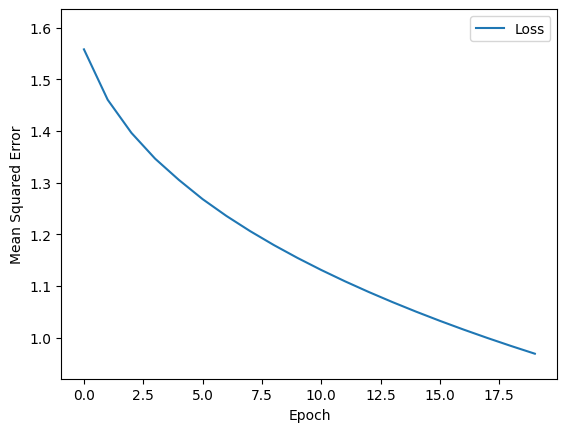


 Evaluate the linear regression model against the test set:
1/1 [==============================] - 0s 166ms/step - loss: 0.9420 - mean_squared_error: 0.9420


[0.9419927597045898, 0.9419927597045898]

In [23]:
learning_rate = 0.01
epochs = 20 
batch_size = 1000

# Zielvariable bestimmen:
target_name = "price"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_data_stand, epochs, batch_size, target_name)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_data_stand.items()}
test_label = np.array(test_features.pop(target_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

## Erstellung von dem (Deep) Neural Network Modell:

In [24]:
def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a simple network."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer.
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit, 
  #     relu, here).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 15 nodes.
  model.add(tf.keras.layers.Dense(units=15, 
                                  activation='relu', 
                                  name='Hidden1'))

  # Define the second hidden layer with 7 nodes (i.e., 15/2)
  model.add(tf.keras.layers.Dense(units=7, 
                                  activation='relu', 
                                  name='Hidden2'))

  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

## Trainingsfunktion:

In [25]:
def train_model(model, dataset, epochs, target_name,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(target_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

## Aufrufen der Funktionen für das Aufbauen und Tranieren des Deep Neuronal Networks:

Epoch 1/20
1/1 [==============================] - 1s 834ms/step - loss: 1.1817 - mean_squared_error: 1.1817
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 1.0483 - mean_squared_error: 1.0483
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 0.9434 - mean_squared_error: 0.9434
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.8592 - mean_squared_error: 0.8592
Epoch 5/20
1/1 [==============================] - 0s 9ms/step - loss: 0.7909 - mean_squared_error: 0.7909
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.7414 - mean_squared_error: 0.7414
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 0.7054 - mean_squared_error: 0.7054
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6787 - mean_squared_error: 0.6787
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6582 - mean_squared_error: 0.6582
Epoch 10/20
1/1 [===========================

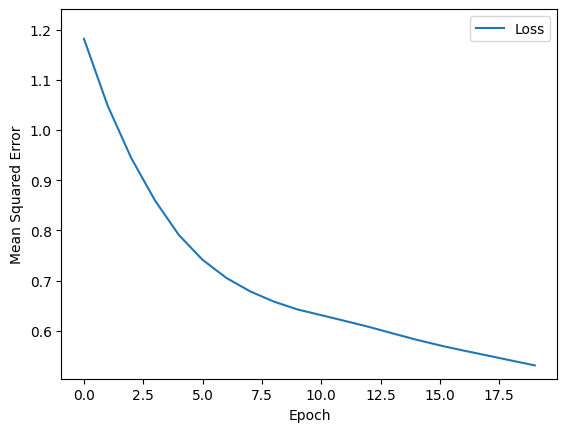


 Evaluate the new model against the test set:
1/1 [==============================] - 0s 146ms/step - loss: 0.6182 - mean_squared_error: 0.6182


[0.6181841492652893, 0.6181841492652893]

In [26]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000

# Recall:
# The batch size is a hyperparameter that controls the number of training 
# samples to work through before the model’s internal parameters are updated.
# The number of epochs is a hyperparameter that controls the number of complete 
# passes through the training dataset.

# Specify the label
target_name = "price"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the standardized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_data_stand, epochs, 
                          target_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_data_stand.items()}
test_target = np.array(test_features.pop(target_name)) # isolate the target
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_target, batch_size=batch_size)

## Vergleich der Modelle:

Das Loss Function des NN-Modells beträgt 0,443 und ist damit niedriger als das Loss Function des linearen Modells, der 0,7275 beträgt. Das bedeutet, dass das NN-Modell eine bessere Vorhersage macht.